In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scotrail dataset

In [216]:
#cols_scotrail = ['Year','Period','Week','ServiceGroup', 'ProductGroup','OpJourneys', 'OpMiles', 'Unnamed']
cols_scotrail = ['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup4',
       'ProdGrp1', 'OpJourneys on selDates', 'OpMiles on selDates']
df_scotrail = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\scotrail-journey-data-2016-2022.csv', na_values='',usecols = cols_scotrail, parse_dates=True, encoding = "ISO-8859-1")
df_scotrail

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup4,ProdGrp1,OpJourneys on selDates,OpMiles on selDates
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739"
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075"
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075"
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878"
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754"
...,...,...,...,...,...,...,...
4870,2022,2022/P03,2022/W13,East Suburban,Peak,"40,874","765,995"
4871,2022,2022/P03,2022/W13,eXpress,Peak,"20,389","692,101"
4872,2022,2022/P03,2022/W13,Inter7City,Peak,"30,408","1,492,769"
4873,2022,2022/P03,2022/W13,Scenic,Peak,"13,488","448,765"


In [55]:
df_scotrail.columns

Index(['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup4',
       'ProdGrp1', 'OpJourneys on selDates', 'OpMiles on selDates'],
      dtype='object')

In [217]:
df_scotrail.columns = ['CalendarYear', 'CalendarPeriod', 'CalendarWeek', 'ServiceGroup', 'ProductGroup', 'OpJourneys','OpMiles']
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739"
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075"
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075"
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878"
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754"


In [57]:
df_scotrail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CalendarYear    4875 non-null   int64 
 1   CalendarPeriod  4875 non-null   object
 2   CalendarWeek    4875 non-null   object
 3   ServiceGroup    4875 non-null   object
 4   ProductGroup    4875 non-null   object
 5   OpJourneys      4875 non-null   object
 6   OpMiles         4875 non-null   object
dtypes: int64(1), object(6)
memory usage: 266.7+ KB


In [218]:
df_scotrail.iloc[:,-2:]

,OpJourneys,OpMiles
0,"68,625","1,163,739"
1,"33,695","953,075"
2,"27,651","757,075"
3,"9,806","180,878"
4,"302,609","3,303,754"
...,...,...
4870,"40,874","765,995"
4871,"20,389","692,101"
4872,"30,408","1,492,769"
4873,"13,488","448,765"


In [219]:
df_scotrail["OpMiles"] = df_scotrail["OpMiles"].str.replace(',', '').astype(int)
df_scotrail["OpJourneys"] = df_scotrail["OpJourneys"].str.replace(',', '').astype(int)
df_scotrail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CalendarYear    4875 non-null   int64 
 1   CalendarPeriod  4875 non-null   object
 2   CalendarWeek    4875 non-null   object
 3   ServiceGroup    4875 non-null   object
 4   ProductGroup    4875 non-null   object
 5   OpJourneys      4875 non-null   int32 
 6   OpMiles         4875 non-null   int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 228.6+ KB


In [59]:
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,68625,1163739
1,2016,2016/P01,2016/W01,eXpress,Commuter,33695,953075
2,2016,2016/P01,2016/W01,Inter7City,Commuter,27651,757075
3,2016,2016/P01,2016/W01,Scenic,Commuter,9806,180878
4,2016,2016/P01,2016/W01,West Suburban,Commuter,302609,3303754


In [60]:
### Finding unique values

In [220]:
# 13 calendar periods
df_scotrail.CalendarPeriod.unique()

array(['2016/P01', '2016/P02', '2016/P03', '2016/P04', '2016/P05',
       '2016/P06', '2016/P07', '2016/P08', '2016/P09', '2016/P10',
       '2016/P11', '2016/P12', '2016/P13', '2017/P01', '2017/P02',
       '2017/P03', '2017/P04', '2017/P05', '2017/P06', '2017/P07',
       '2017/P08', '2017/P09', '2017/P10', '2017/P11', '2017/P12',
       '2017/P13', '2018/P01', '2018/P02', '2018/P03', '2018/P04',
       '2018/P05', '2018/P06', '2018/P07', '2018/P08', '2018/P09',
       '2018/P10', '2018/P11', '2018/P12', '2018/P13', '2019/P01',
       '2019/P02', '2019/P03', '2019/P04', '2019/P05', '2019/P06',
       '2019/P07', '2019/P08', '2019/P09', '2019/P10', '2019/P11',
       '2019/P12', '2019/P13', '2020/P01', '2020/P02', '2020/P03',
       '2020/P04', '2020/P05', '2020/P06', '2020/P07', '2020/P08',
       '2020/P09', '2020/P10', '2020/P11', '2020/P12', '2020/P13',
       '2021/P01', '2021/P02', '2021/P03', '2021/P04', '2021/P05',
       '2021/P06', '2021/P07', '2021/P08', '2021/P09', '2021/P

In [31]:
# 52 weeks in a year
df_scotrail.CalendarWeek.unique()

array(['2016/W01', '2016/W02', '2016/W03', '2016/W04', '2016/W05',
       '2016/W06', '2016/W07', '2016/W08', '2016/W09', '2016/W10',
       '2016/W11', '2016/W12', '2016/W13', '2016/W14', '2016/W15',
       '2016/W16', '2016/W17', '2016/W18', '2016/W19', '2016/W20',
       '2016/W21', '2016/W22', '2016/W23', '2016/W24', '2016/W25',
       '2016/W26', '2016/W27', '2016/W28', '2016/W29', '2016/W30',
       '2016/W31', '2016/W32', '2016/W33', '2016/W34', '2016/W35',
       '2016/W36', '2016/W37', '2016/W38', '2016/W39', '2016/W40',
       '2016/W41', '2016/W42', '2016/W43', '2016/W44', '2016/W45',
       '2016/W46', '2016/W47', '2016/W48', '2016/W49', '2016/W50',
       '2016/W51', '2016/W52', '2017/W01', '2017/W02', '2017/W03',
       '2017/W04', '2017/W05', '2017/W06', '2017/W07', '2017/W08',
       '2017/W09', '2017/W10', '2017/W11', '2017/W12', '2017/W13',
       '2017/W14', '2017/W15', '2017/W16', '2017/W17', '2017/W18',
       '2017/W19', '2017/W20', '2017/W21', '2017/W22', '2017/W

In [30]:
df_scotrail.ProductGroup.unique()

array(['Commuter', 'Off-Peak', 'Peak'], dtype=object)

In [176]:
df_scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup,ProductGroup,OpJourneys,OpMiles
0,2016,2016/P01,2016/W01,East Suburban,Commuter,68625,1163739
1,2016,2016/P01,2016/W01,eXpress,Commuter,33695,953075
2,2016,2016/P01,2016/W01,Inter7City,Commuter,27651,757075
3,2016,2016/P01,2016/W01,Scenic,Commuter,9806,180878
4,2016,2016/P01,2016/W01,West Suburban,Commuter,302609,3303754


In [64]:
df_scotrail.to_csv('scotrail_cleaned.csv')

## Skyscan dataset

In [424]:
df_skyscan = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscanner-data.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")
df_skyscan

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\3684984604.py:1: DtypeWarning: Columns (12,13,14,15,17,19,20,21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_skyscan = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscanner-data.csv', na_values='',  parse_dates=True, encoding = "ISO-8859-1")


,dt,search_guid,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,...,amount,unit,operating_carrier,booking_panel_option_guid,booking_type,partner,partner_currency,partner_price,redirect,redirect_platform
0,2019-05-06,791993e8-c93f-4617-bf3c-3f434e923529,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,...,83000.0,CENTI,-32302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-02,8506e372-50b8-4a31-ae69-1ff292b0d941,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,...,26200.0,CENTI,-32528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-06,54552252-3b91-412f-89aa-8625523e3c33,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,...,18600.0,CENTI,-32132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-06,175091f5-c294-4582-8285-1f32ac56f5ce,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,...,58100.0,CENTI,-32132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-02,270dc4a8-6983-4ce3-955f-2387ad00c361,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,...,8600.0,CENTI,-32356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,4cf1ff8f-b172-4743-ad2e-ee38c1aca4ef,REDIRECT,gtcz,CZK,782600.0,NaN,NaN
182001,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,1e213141-217a-4257-a753-3242e4936ba6,REDIRECT,ctcz,CZK,839800.0,NaN,NaN
182002,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,6885347a-22e2-4183-a09e-caf03ffe1a31,REDIRECT,edcz,CZK,742000.0,NaN,NaN
182003,2022-05-02,28d9c669-59e5-489a-9896-450046da919b,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,...,735600.0,CENTI,-30821.0,7cb8c500-47b0-4e33-b987-52e2ee912e17,REDIRECT,pecz,CZK,782100.0,NaN,NaN


In [92]:
df_skyscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182005 entries, 0 to 182004
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dt                          182005 non-null  object 
 1   search_guid                 182005 non-null  object 
 2   device_type                 182005 non-null  object 
 3   search_origin               182005 non-null  object 
 4   search_destination          182005 non-null  object 
 5   search_route                182005 non-null  object 
 6   search_adult_count          157378 non-null  float64
 7   search_child_count          157378 non-null  float64
 8   search_cabin_class          157378 non-null  object 
 9   search_type                 182005 non-null  object 
 10  search_departure_date       182005 non-null  object 
 11  search_arrival_date         97386 non-null   object 
 12  search_results_page_guid    129480 non-null  object 
 13  search_results

In [112]:
df_skyscan.columns

Index(['dt', 'search_guid', 'device_type', 'search_origin',
       'search_destination', 'search_route', 'search_adult_count',
       'search_child_count', 'search_cabin_class', 'search_type',
       'search_departure_date', 'search_arrival_date',
       'search_results_page_guid', 'search_results_option_guid',
       'is_marked_as_eco_option', 'currency', 'amount', 'unit',
       'operating_carrier', 'booking_panel_option_guid', 'booking_type',
       'partner', 'partner_currency', 'partner_price', 'redirect',
       'redirect_platform'],
      dtype='object')

In [425]:
df_skyscan = df_skyscan[['dt', 'device_type', 'search_origin',
       'search_destination', 'search_route', 'search_adult_count',
       'search_child_count', 'search_cabin_class', 'search_type',
       'search_departure_date', 'search_arrival_date',      
       'is_marked_as_eco_option', 'currency', 'amount', 'unit',
       'operating_carrier', 'booking_type']]

In [426]:
df_skyscan["dt"] = pd.to_datetime(df_skyscan.loc[:, 'dt'], format='%Y-%m-%d')
df_skyscan["search_arrival_date"] = pd.to_datetime(df_skyscan.loc[:, 'search_arrival_date'], format='%Y-%m-%d')

df_skyscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182005 entries, 0 to 182004
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   dt                       182005 non-null  datetime64[ns]
 1   device_type              182005 non-null  object        
 2   search_origin            182005 non-null  object        
 3   search_destination       182005 non-null  object        
 4   search_route             182005 non-null  object        
 5   search_adult_count       157378 non-null  float64       
 6   search_child_count       157378 non-null  float64       
 7   search_cabin_class       157378 non-null  object        
 8   search_type              182005 non-null  object        
 9   search_departure_date    182005 non-null  object        
 10  search_arrival_date      97386 non-null   datetime64[ns]
 11  is_marked_as_eco_option  125678 non-null  object        
 12  currency        

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\447093911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skyscan["dt"] = pd.to_datetime(df_skyscan.loc[:, 'dt'], format='%Y-%m-%d')
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\447093911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skyscan["search_arrival_date"] = pd.to_datetime(df_skyscan.loc[:, 'search_arrival_date'], format='%Y-%m-%d')


In [427]:
df_scan_clean = df_skyscan.loc[~((df_skyscan.search_departure_date.str.startswith('1478'))|(df_skyscan.search_departure_date.str.startswith('1479')))]

In [198]:
df_scan_clean

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,is_marked_as_eco_option,currency,amount,unit,operating_carrier,booking_type
0,2019-05-06,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,2019-06-14 00:00:00,NaT,False,BRL,83000.0,CENTI,-32302.0,NaN
1,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-07-07 00:00:00,2022-07-10,False,GBP,26200.0,CENTI,-32528.0,NaN
2,2019-05-06,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,2020-04-09 00:00:00,2020-04-13,False,GBP,18600.0,CENTI,-32132.0,NaN
3,2019-05-06,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,2019-08-06 00:00:00,2019-08-13,False,EUR,58100.0,CENTI,-32132.0,NaN
4,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-05-19 00:00:00,2022-05-21,True,GBP,8600.0,CENTI,-32356.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182001,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182002,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182003,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16 00:00:00,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT


In [428]:
df_clean["search_departure_date"] = pd.to_datetime(df_scan_clean.loc[:, 'search_departure_date'], format='%Y-%m-%d')
df_clean

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,is_marked_as_eco_option,currency,amount,unit,operating_carrier,booking_type
0,2019-05-06,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,2019-06-14,NaT,False,BRL,83000.0,CENTI,-32302.0,NaN
1,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-07-07,2022-07-10,False,GBP,26200.0,CENTI,-32528.0,NaN
2,2019-05-06,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,2020-04-09,2020-04-13,False,GBP,18600.0,CENTI,-32132.0,NaN
3,2019-05-06,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,2019-08-06,2019-08-13,False,EUR,58100.0,CENTI,-32132.0,NaN
4,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-05-19,2022-05-21,True,GBP,8600.0,CENTI,-32356.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182001,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182002,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT
182003,2022-05-02,IOS,VIE,EDI,VIE-EDI,1.0,0.0,ECONOMY,return,2022-07-16,2022-07-19,False,CZK,735600.0,CENTI,-30821.0,REDIRECT


In [429]:
df_clean.search_origin.value_counts().head(12)

LOND    21582
LHR      5260
LGW      3762
DUB      3674
BHX      3636
AMS      2779
BRS      2704
BELF     2675
MAN      2569
MAD      2477
BCN      2414
AGP      2133
Name: search_origin, dtype: int64

In [227]:
df_clean.is_marked_as_eco_option.value_counts()

False    115715
True       9963
Name: is_marked_as_eco_option, dtype: int64

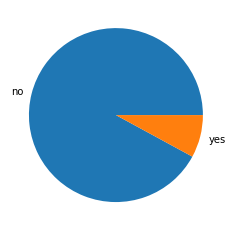

In [430]:
# Visualising the Eco option.

mylabels =df_clean.is_marked_as_eco_option.value_counts() 
plt.pie(df_clean.is_marked_as_eco_option.value_counts(), labels = ['no', 'yes'])
plt.show() 

In [431]:
# Narrowing down to the Eco option. Top 12 origins by the Eco-friendly option

#df_clean_true = df_clean[df_clean['is_marked_as_eco_option'] ==True]
#df_clean_true.head()
df_clean_true.search_origin.value_counts().head(12)

LOND    2886
LHR      837
LGW      683
BHX      419
BRS      354
AMS      235
DUB      197
LTN      169
BELF     144
BRIS     119
ORK      106
BCN       92
Name: search_origin, dtype: int64

In [432]:
df_clean.head()

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,is_marked_as_eco_option,currency,amount,unit,operating_carrier,booking_type
0,2019-05-06,IOS,ABER,EDI,ABER-EDI,1.0,0.0,ECONOMY,oneway,2019-06-14,NaT,False,BRL,83000.0,CENTI,-32302.0,NaN
1,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-07-07,2022-07-10,False,GBP,26200.0,CENTI,-32528.0,NaN
2,2019-05-06,IOS,LHR,ABZ,LHR-ABZ,1.0,0.0,ECONOMY,return,2020-04-09,2020-04-13,False,GBP,18600.0,CENTI,-32132.0,NaN
3,2019-05-06,IOS,MILA,INV,MILA-INV,2.0,0.0,ECONOMY,return,2019-08-06,2019-08-13,False,EUR,58100.0,CENTI,-32132.0,NaN
4,2022-05-02,IOS,LOND,EDI,LOND-EDI,1.0,0.0,ECONOMY,return,2022-05-19,2022-05-21,True,GBP,8600.0,CENTI,-32356.0,NaN


In [200]:
df_clean.to_csv('skyscan_cleaned_all.csv')

In [230]:
skyscan_eco_only = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscan_dist_eco_only.csv', na_values='', parse_dates=True, encoding = "ISO-8859-1")
skyscan_eco_only

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,booking_type,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles
0,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26,...,REDIRECT,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244
1,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,DIRECT_BOOKING,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
3,2022-02-05,IOS,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
4,2022-02-05,IOS,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-02-05,IOS,ACE,GLA,ACE-GLA,2.0,0.0,ECONOMY,oneway,2022-08-05,...,REDIRECT,28.945499,-13.605200,ES,ACE,55.871899,-4.433060,GB,GLA,1914.586973
280,2022-02-05,IOS,AGP,GLA,AGP-GLA,2.0,0.0,ECONOMY,return,2022-03-05,...,REDIRECT,36.674900,-4.499110,ES,AGP,55.871899,-4.433060,GB,GLA,1326.389906
281,2022-02-05,IOS,TFS,PIK,TFS-PIK,2.0,0.0,ECONOMY,oneway,2022-03-05,...,REDIRECT,28.044500,-16.572500,ES,TFS,55.502003,-4.587019,GB,PIK,1988.663706
282,2022-02-05,IOS,LPA,PIK,LPA-PIK,1.0,0.0,ECONOMY,oneway,2022-10-07,...,REDIRECT,27.931900,-15.386600,ES,LPA,55.502003,-4.587019,GB,PIK,1979.381332


In [233]:
# Edinburgh, Inverness, Aberdeen, Glasgow, Glasgow Prestwick
lst_destination = skyscan_eco_only.search_destination.unique()
print(lst_destination)

['EDI' 'INV' 'ABZ' 'GLA' 'PIK']


In [234]:
# Sao Paolo Guarulhos(Brazil), London Heathrow, Sofia (Bulgaria), Seville (Spain)...
lst_origin = skyscan_eco_only.search_origin.unique()
print(lst_origin)

['GRU' 'LHR' 'SOF' 'SVQ' 'PMI' 'CTA' 'MAD' 'BER' 'DUB' 'GVA' 'OTP' 'LGW'
 'ALC' 'DLM' 'MUC' 'CTU' 'BFS' 'IST' 'BRS' 'BHX' 'MLA' 'BCN' 'ICN' 'AKL'
 'SPU' 'FAO' 'AMS' 'SYY' 'HKG' 'GIB' 'CAG' 'AGP' 'TLS' 'KRK' 'LTN' 'CLJ'
 'TFS' 'LIS' 'CRL' 'MRS' 'TRF' 'ZRH' 'NAP' 'CGN' 'LCA' 'OPO' 'HAM' 'LPA'
 'STN' 'OSL' 'DPS' 'BLL' 'VLC' 'FKB' 'PSA' 'BSL' 'VNO' 'ORK' 'BLQ' 'GDN'
 'LBA' 'EMA' 'SYD' 'MAN' 'SOU' 'ACE']


In [245]:
# Top 10 origin airports for Eco only.

#London Heathrow, London Gatwick, Birmingham, Alicante(Spain), Lisbon(Portgal)
# Bristol, Malaga(Spain), Barcelona(Spain),Dalaman(Turkey),Belfast
skyscan_eco_only.search_origin.value_counts().head(10)

LHR    79
LGW    30
BHX    24
ALC    10
LIS     9
BRS     7
AGP     6
BCN     6
DLM     4
BFS     4
Name: search_origin, dtype: int64

In [262]:
len(skyscan_eco_only.search_origin.value_counts())

66

In [ ]:
### ECO domestic flights

In [360]:
dom_uk_eco = skyscan_eco_only.loc[skyscan_eco_only.iso_country_origin=='GB']
dom_uk_eco['distance_km'] = dom_uk_eco['distance_miles']* 1.609344
dom_uk_eco['CO2_emissions'] = dom_uk_eco['distance_km']*11.1*0.62137119
dom_uk_eco['CO2_emissions_per_passenger'] = dom_uk_eco['CO2_emissions']/142
dom_uk_eco

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\574316823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dom_uk_eco['distance_km'] = dom_uk_eco['distance_miles']* 1.609344
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\574316823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dom_uk_eco['CO2_emissions'] = dom_uk_eco['distance_km']*11.1*0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\574316823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
1,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
3,2022-02-05,IOS,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
4,2022-02-05,IOS,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
5,2022-02-05,IOS,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-03-05,IOS,LHR,GLA,LHR-GLA,1.0,0.0,ECONOMY,oneway,2021-03-05,...,GB,LHR,55.871899,-4.433060,GB,GLA,344.683445,554.714235,3825.986229,26.943565
273,2022-02-05,IOS,LHR,GLA,LHR-GLA,1.0,0.0,ECONOMY,oneway,2022-04-05,...,GB,LHR,55.871899,-4.433060,GB,GLA,344.683445,554.714235,3825.986229,26.943565
274,2022-02-05,IOS,LGW,GLA,LGW-GLA,1.0,0.0,ECONOMY,return,2022-05-13,...,GB,LGW,55.871899,-4.433060,GB,GLA,369.860025,595.232013,4105.446267,28.911593
275,2022-02-05,IOS,LGW,GLA,LGW-GLA,1.0,0.0,ECONOMY,return,2022-05-13,...,GB,LGW,55.871899,-4.433060,GB,GLA,369.860025,595.232013,4105.446267,28.911593


In [363]:
dom_uk_eco.columns

Index(['dt', 'device_type', 'search_origin', 'search_destination',
       'search_route', 'search_adult_count', 'search_child_count',
       'search_cabin_class', 'search_type', 'search_departure_date',
       'search_arrival_date', 'currency', 'amount', 'unit',
       'operating_carrier', 'booking_type', 'latitude_deg_origin',
       'longitude_deg_origin', 'iso_country_origin', 'iata_code_origin',
       'latitude_deg_dest', 'longitude_deg_dest', 'iata_code_dest',
       'distance_miles', 'distance_km', 'CO2_emissions',
       'CO2_emissions_per_passenger'],
      dtype='object')

In [362]:
dom_uk_eco.drop(columns = {'iso_country_dest','iso_country_dest', 'is_marked_as_eco_option'}, inplace=True) 

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\3746008418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dom_uk_eco.drop(columns = {'iso_country_dest','iso_country_dest', 'is_marked_as_eco_option'}, inplace=True)


In [338]:
dom_uk_eco.head()

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iata_code_dest,distance_miles,CO2_emissions,CO2_emissions_per_passenger
1,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,51.4706,-0.461941,GB,LHR,55.950145,-3.372288,EDI,331.526942,3679.949058,25.915134
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,...,51.4706,-0.461941,GB,LHR,55.950145,-3.372288,EDI,331.526942,3679.949058,25.915134
3,2022-02-05,IOS,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05,...,51.4706,-0.461941,GB,LHR,55.950145,-3.372288,EDI,331.526942,3679.949058,25.915134
4,2022-02-05,IOS,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,...,51.4706,-0.461941,GB,LHR,55.950145,-3.372288,EDI,331.526942,3679.949058,25.915134
5,2022-02-05,IOS,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,...,51.4706,-0.461941,GB,LHR,55.950145,-3.372288,EDI,331.526942,3679.949058,25.915134


In [370]:
dom_uk_eco.to_csv('ECO_Flights_dist_with_emissions_UK_only.csv')

In [366]:
rest_non_dom = skyscan_eco_only.loc[skyscan_eco_only.iso_country_origin!='GB']
rest_non_dom['distance_km'] = rest_non_dom['distance_miles']* 1.609344
rest_non_dom.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\1553305593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_non_dom['distance_km'] = rest_non_dom['distance_miles']* 1.609344


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km
0,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26,...,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416
55,2022-02-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2022-05-22,...,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765
56,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-20,...,37.417999,-5.893110,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075
57,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-20,...,37.417999,-5.893110,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075
58,2022-02-05,IOS,PMI,EDI,PMI-EDI,1.0,0.0,ECONOMY,oneway,2022-06-20,...,39.551701,2.738810,ES,PMI,55.950145,-3.372288,GB,EDI,1166.933250,1877.997024


In [367]:
rest_short_haul = rest_non_dom.loc[rest_non_dom.distance_km<=3700]

rest_short_haul['CO2_emissions'] = rest_short_haul['distance_km']*11.8 *0.62137119
rest_short_haul['CO2_emissions_per_passenger'] = rest_short_haul['CO2_emissions']/185
rest_short_haul.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\2343965942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_short_haul['CO2_emissions'] = rest_short_haul['distance_km']*11.8 *0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\2343965942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_short_haul['CO2_emissions_per_passenger'] = rest_short_haul['CO2_emissions']/185


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
55,2022-02-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2022-05-22,...,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765,17681.513785,95.575750
56,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-20,...,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075,15172.422051,82.013092
57,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-20,...,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075,15172.422051,82.013092
58,2022-02-05,IOS,PMI,EDI,PMI-EDI,1.0,0.0,ECONOMY,oneway,2022-06-20,...,ES,PMI,55.950145,-3.372288,GB,EDI,1166.933250,1877.997024,13769.812300,74.431418
59,2022-02-05,IOS,PMI,EDI,PMI-EDI,1.0,0.0,ECONOMY,oneway,2022-06-20,...,ES,PMI,55.950145,-3.372288,GB,EDI,1166.933250,1877.997024,13769.812300,74.431418


In [368]:
rest_long_haul = rest_non_dom.loc[rest_non_dom.distance_km>3700]
rest_long_haul['CO2_emissions'] = rest_long_haul['distance_km']*26.9*0.62137119
rest_long_haul['CO2_emissions_per_passenger'] = rest_long_haul['CO2_emissions']/322
rest_long_haul.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\4124641650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_long_haul['CO2_emissions'] = rest_long_haul['distance_km']*26.9*0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\4124641650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_long_haul['CO2_emissions_per_passenger'] = rest_long_haul['CO2_emissions']/322


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
0,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26,...,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416,162411.123190,504.382370
115,2021-03-05,IOS,CTU,EDI,CTU-EDI,1.0,0.0,ECONOMY,oneway,2021-08-26,...,CN,CTU,55.950145,-3.372288,GB,EDI,5104.328302,8214.620126,137306.430820,426.417487
157,2022-02-05,IOS,ICN,EDI,ICN-EDI,1.0,0.0,ECONOMY,oneway,2022-04-05,...,KR,ICN,55.950145,-3.372288,GB,EDI,5342.586488,8598.059509,143715.576015,446.321665
158,2022-02-05,IOS,AKL,EDI,AKL-EDI,1.0,0.0,ECONOMY,return,2022-05-07,...,NZ,AKL,55.950145,-3.372288,GB,EDI,11125.500383,17904.757288,299275.959214,929.428445
169,2022-02-05,IOS,HKG,EDI,HKG-EDI,2.0,0.0,ECONOMY,oneway,2022-06-24,...,HK,HKG,55.950145,-3.372288,GB,EDI,5913.133625,9516.266120,159063.293928,493.985385


In [379]:
df_merged_eco = pd.concat([dom_uk_eco, rest_short_haul, rest_long_haul]).sort_index()
df_merged_eco.drop(columns = {'iso_country_dest','iso_country_dest','device_type', 'is_marked_as_eco_option','iata_code_origin', 'iata_code_dest','latitude_deg_dest','latitude_deg_origin', 'longitude_deg_origin','longitude_deg_dest','distance_miles', 'distance_km'}, inplace=True)
df_merged_eco.head()

,dt,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,search_arrival_date,currency,amount,unit,operating_carrier,booking_type,iso_country_origin,CO2_emissions,CO2_emissions_per_passenger
0,2022-02-05,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26,2022-11-29,BRL,383100.0,CENTI,-32222,REDIRECT,BR,162411.123190,504.382370
1,2022-02-05,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,NaN,NZD,29900.0,CENTI,-32480,REDIRECT,GB,3679.949045,25.915134
2,2022-02-05,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18,NaN,NZD,29900.0,CENTI,-32480,DIRECT_BOOKING,GB,3679.949045,25.915134
3,2022-02-05,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05,NaN,AUD,20300.0,CENTI,-32356,REDIRECT,GB,3679.949045,25.915134
4,2022-02-05,LHR,EDI,LOND-EDI,1.0,0.0,ECONOMY,oneway,2022-02-05,NaN,GBP,10100.0,CENTI,-32356,REDIRECT,GB,3679.949045,25.915134


In [380]:
df_merged_eco.to_csv('ECO_Flights_dist_with_emissions_all.csv')

In [469]:
s_merged_eco_by_flight = df_merged_eco.groupby(['iso_country_origin'])['CO2_emissions'].sum()
s_merged_eco_by_flight

iso_country_origin
AU    279882.427806
BE     11757.813189
BG     17681.513785
BR    162411.123190
CH     27571.684063
CN    137306.430820
CY     53473.543764
DE     71759.674879
DK     17182.256265
ES    632237.224201
FR     52506.389161
GB    589072.676778
GI     16179.214315
HK    318350.802512
HR     14387.264975
ID    209985.999542
IE     22350.281678
IT    106671.402471
KR    143715.576015
LT     13250.974856
MT     19132.171240
NL     19543.545940
NO     13616.650602
NZ    299275.959214
PL     32667.307874
PT    218607.096046
RO     84263.397417
TR    115076.692750
Name: CO2_emissions, dtype: float64

In [477]:
s_merged_eco_no_flights = df_merged_eco.groupby(['iso_country_origin'])['iso_country_origin'].count()
s_merged_eco_no_flights

iso_country_origin
AU      1
BE      2
BG      1
BR      1
CH      3
CN      1
CY      2
DE      9
DK      3
ES     40
FR      5
GB    159
GI      1
HK      2
HR      1
ID      1
IE      7
IT      7
KR      1
LT      1
MT      1
NL      4
NO      2
NZ      1
PL      3
PT     15
RO      5
TR      5
Name: iso_country_origin, dtype: int64

In [478]:
df_merged_eco_by_flight = s_merged_eco_by_flight.to_frame().reset_index()
df_merged_eco_by_flight['no_flights'] = s_merged_eco_no_flights.values
df_merged_eco_by_flight['CO2_per_flight'] = df_merged_eco_by_flight['CO2_emissions']/df_merged_eco_by_flight['no_flights']
df_merged_eco_by_flight

,iso_country_origin,CO2_emissions,no_flights,CO2_per_flight
0,AU,279882.427806,1,279882.427806
1,BE,11757.813189,2,5878.906595
2,BG,17681.513785,1,17681.513785
3,BR,162411.123190,1,162411.123190
4,CH,27571.684063,3,9190.561354
5,CN,137306.430820,1,137306.430820
6,CY,53473.543764,2,26736.771882
7,DE,71759.674879,9,7973.297209
8,DK,17182.256265,3,5727.418755
9,ES,632237.224201,40,15805.930605


In [480]:
df_merged_eco_by_flight.to_csv('ECO_Flights_dist_with_emissions_per_flight.csv')

In [231]:
skyscan_dist_no_duplicates = pd.read_csv('C:\\Users\\maria\\Jupiter_Notebooks\\Visit_Scotland_Project\\skyscan_dist_no_duplicates.csv', na_values='', parse_dates=True, encoding = "ISO-8859-1")
skyscan_dist_no_duplicates

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,booking_type,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles
0,2021-03-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,oneway,2021-06-17 00:00:00,...,REDIRECT,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244
1,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26 00:00:00,...,REDIRECT,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
3,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,DIRECT_BOOKING,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
4,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2022-02-05,IOS,TFS,PIK,TFS-PIK,2.0,0.0,ECONOMY,oneway,2022-03-05 00:00:00,...,REDIRECT,28.044500,-16.572500,ES,TFS,55.502003,-4.587019,GB,PIK,1988.663706
1089,2022-02-05,IOS,LPA,PIK,LPA-PIK,1.0,0.0,ECONOMY,oneway,2022-10-07 00:00:00,...,REDIRECT,27.931900,-15.386600,ES,LPA,55.502003,-4.587019,GB,PIK,1979.381332
1090,2022-02-05,IOS,LPA,PIK,LPA-PIK,1.0,0.0,ECONOMY,oneway,2022-10-07 00:00:00,...,DIRECT_BOOKING,27.931900,-15.386600,ES,LPA,55.502003,-4.587019,GB,PIK,1979.381332
1091,2019-06-05,IOS,CIA,PIK,CIA-PIK,1.0,0.0,ECONOMY,return,2019-04-06 00:00:00,...,REDIRECT,41.799400,12.594900,IT,CIA,55.502003,-4.587019,GB,PIK,1222.514944


In [246]:
# Edinburgh, Inverness, Aberdeen, Glasgow, Glasgow Prestwick, Dundee
lst_destination_no_dupl = skyscan_dist_no_duplicates.search_destination.unique()
print(lst_destination_no_dupl)

['EDI' 'INV' 'ABZ' 'GLA' 'PIK' 'DND']


In [247]:
lst_origin_no_dupl = skyscan_dist_no_duplicates.search_origin.unique()
print(lst_origin_no_dupl)

['GRU' 'LHR' 'SOF' 'SVQ' 'PMI' 'CTA' 'MXP' 'MAD' 'BER' 'DUB' 'GVA' 'OTP'
 'LGW' 'BNE' 'LCY' 'SYD' 'ALC' 'VRN' 'DLM' 'JER' 'MUC' 'ISB' 'CTU' 'BFS'
 'PER' 'IST' 'ZAG' 'MAN' 'DEL' 'BRS' 'BHX' 'MLA' 'BCN' 'ICN' 'AKL' 'SPU'
 'FAO' 'BKK' 'AMS' 'KHI' 'SYY' 'PUY' 'HKG' 'NQY' 'BOD' 'TSF' 'DEN' 'SLC'
 'GIB' 'CAG' 'REC' 'CWL' 'AGP' 'TLS' 'IBZ' 'RUH' 'SEA' 'CPT' 'KRK' 'GOA'
 'SOU' 'COK' 'LTN' 'BOS' 'CLJ' 'TFS' 'RDU' 'SAL' 'LIS' 'CRL' 'PVG' 'MRS'
 'HEL' 'TRF' 'ZRH' 'CDG' 'SKG' 'VIE' 'SGN' 'SFO' 'CCF' 'BNA' 'PRG' 'NAP'
 'CGN' 'CAI' 'KWI' 'GOT' 'LOS' 'LUN' 'LCA' 'SIN' 'NOC' 'STR' 'MCO' 'ORD'
 'BOI' 'LBA' 'LHE' 'EMA' 'OPO' 'HAM' 'ATH' 'DBV' 'CAN' 'ARN' 'TRV' 'PFO'
 'EBL' 'YVR' 'LPA' 'STN' 'BOG' 'OSL' 'LPL' 'BGY' 'GYD' 'BOM' 'DPS' 'DRW'
 'KHH' 'MIA' 'BLL' 'EVN' 'SAV' 'PIT' 'JFK' 'ADB' 'EXT' 'SKP' 'SAP' 'DOH'
 'VLC' 'RIX' 'FKB' 'PSA' 'BSL' 'SCQ' 'VNO' 'ORK' 'BLQ' 'BOH' 'LDY' 'CMN'
 'PQQ' 'MSP' 'BUD' 'PEN' 'BRI' 'GDN' 'BRU' 'PHX' 'CJU' 'WIC' 'NWI' 'KUL'
 'CUN' 'PUS' 'HUY' 'SVG' 'JED' 'MME' 'BRE' 'DUS' 'E

In [272]:
# Top 20 origin airports
#London Heathrow, London Gatwick, Birmingham, Dublin(Ireland), Madrid(Spain), Chengdu(China), 
#Southampton, Munich(Germany), Bristol, Seville(Spain), Barcelona(Spain), Malaga(Spain), London Luton, Alicante(Spain)
#Hong Kong(HK), Manchester, Amsterdam(Netherlands), EastMidlands, Lisbon(Portugal),Bangkok(Thailand)
skyscan_dist_no_duplicates.search_origin.value_counts().head(20)                                                            

LHR    256
LGW     47
BHX     47
DUB     33
MAD     24
CTU     22
SOU     22
MUC     20
BRS     18
SVQ     18
BCN     15
AGP     15
LTN     15
ALC     14
HKG     14
MAN     13
AMS     13
EMA     13
LIS     12
BKK     10
Name: search_origin, dtype: int64

In [259]:
len(skyscan_dist_no_duplicates.search_origin.value_counts())

175

In [256]:
# Select these top 10 cities only.

select_top10_no_dupl = skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates['search_origin'].isin(['LHR' , 'LGW', 'BHX','DUB','MAD','CTU','SOU','MUC','BRS','SVQ'])]
select_top10_no_dupl

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,booking_type,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
3,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,DIRECT_BOOKING,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
4,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
5,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,DIRECT_BOOKING,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
6,2022-02-05,IOS,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05 00:00:00,...,REDIRECT,51.470600,-0.461941,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2019-06-05,IOS,LGW,GLA,LGW-GLA,1.0,0.0,ECONOMY,oneway,2019-09-05 00:00:00,...,DIRECT_BOOKING,51.148102,-0.190278,GB,LGW,55.871899,-4.433060,GB,GLA,369.860025
1036,2019-06-05,IOS,LGW,GLA,LGW-GLA,1.0,0.0,ECONOMY,oneway,2019-09-05 00:00:00,...,REDIRECT,51.148102,-0.190278,GB,LGW,55.871899,-4.433060,GB,GLA,369.860025
1040,2019-06-05,IOS,BRS,GLA,BRS-GLA,1.0,1.0,ECONOMY,return,2019-01-08 00:00:00,...,DIRECT_BOOKING,51.382702,-2.719090,GB,BRS,55.871899,-4.433060,GB,GLA,317.999014
1041,2019-06-05,IOS,BRS,GLA,BRS-GLA,1.0,1.0,ECONOMY,return,2019-01-08 00:00:00,...,REDIRECT,51.382702,-2.719090,GB,BRS,55.871899,-4.433060,GB,GLA,317.999014


In [266]:
skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates['search_origin']=='SVQ'].head(1)

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,booking_type,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles
188,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-19 00:00:00,...,REDIRECT,37.417999,-5.89311,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484


In [ ]:
# Avg emissions
dom_em = 11.1
# up to a 3,700km
short_haul_em = 11.8
# over up to a 3,700km
long_haul_em = 26.9

# Avg no. of seats (passenger numbers)
dom_seats = 142
short_haul = 185
long_haul_em = 322

In [ ]:
lst_dom = ['LHR', 'LGW','BHX','SOU', 'BRS']
lst_short_haul = ['DUB','MUC','MAD', 'SVQ', 'ALC','BCN']
lst_long_haul = ['CTU', 'HKG']

In [ ]:
# Dataframe 1. Domestic flights

In [351]:
#df_dom = skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates.iso_country_origin=='GB']
df_dom = skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates.iso_country_origin=='GB']
df_dom['distance_km'] = df_dom['distance_miles']* 1.609344
df_dom['CO2_emissions'] = df_dom['distance_km']*11.1*0.62137119
df_dom['CO2_emissions_per_passenger'] = df_dom['CO2_emissions']/142
df_dom.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\2377286104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dom['distance_km'] = df_dom['distance_miles']* 1.609344
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\2377286104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dom['CO2_emissions'] = df_dom['distance_km']*11.1*0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\2377286104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
3,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
4,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
5,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
6,2022-02-05,IOS,LHR,EDI,LOND-EDI,2.0,0.0,ECONOMY,oneway,2022-06-05 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134


In [352]:
df_dom.to_csv('Flights_dist_no_duplicates_with_emissions_UK_only.csv')

In [346]:
df_non_dom = skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates.iso_country_origin!='GB']
df_non_dom.head()

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,booking_type,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles
0,2021-03-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,oneway,2021-06-17 00:00:00,...,REDIRECT,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244
1,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26 00:00:00,...,REDIRECT,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244
185,2019-06-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,REDIRECT,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377
186,2022-02-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2022-05-22 00:00:00,...,REDIRECT,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377
187,2019-06-05,IOS,SOF,EDI,SOF-EDI,1.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,REDIRECT,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377


In [ ]:
# Dataframe 2. Short-haul flights

In [347]:
df_non_dom['distance_km'] = df_non_dom['distance_miles']* 1.609344
df_non_dom.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\3313808527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_dom['distance_km'] = df_non_dom['distance_miles']* 1.609344


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,latitude_deg_origin,longitude_deg_origin,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km
0,2021-03-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,oneway,2021-06-17 00:00:00,...,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416
1,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26 00:00:00,...,-23.431944,-46.467778,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416
185,2019-06-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765
186,2022-02-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2022-05-22 00:00:00,...,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765
187,2019-06-05,IOS,SOF,EDI,SOF-EDI,1.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,42.696693,23.411436,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765


In [354]:
df_short_haul = df_non_dom.loc[df_non_dom.distance_km<=3700]

df_short_haul['CO2_emissions'] = df_short_haul['distance_km']*11.8 *0.62137119
df_short_haul['CO2_emissions_per_passenger'] = df_short_haul['CO2_emissions']/185
df_short_haul.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\4281988157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_haul['CO2_emissions'] = df_short_haul['distance_km']*11.8 *0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\4281988157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_haul['CO2_emissions_per_passenger'] = df_short_haul['CO2_emissions']/185


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
185,2019-06-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765,17681.513785,95.575750
186,2022-02-05,IOS,SOF,EDI,SOF-EDI,2.0,0.0,ECONOMY,return,2022-05-22 00:00:00,...,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765,17681.513785,95.575750
187,2019-06-05,IOS,SOF,EDI,SOF-EDI,1.0,0.0,ECONOMY,return,2019-05-06 00:00:00,...,BG,SOF,55.950145,-3.372288,GB,EDI,1498.433377,2411.494765,17681.513785,95.575750
188,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-19 00:00:00,...,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075,15172.422051,82.013092
189,2022-02-05,IOS,SVQ,EDI,SVQ-EDI,1.0,0.0,ECONOMY,oneway,2022-05-20 00:00:00,...,ES,SVQ,55.950145,-3.372288,GB,EDI,1285.798484,2069.292075,15172.422051,82.013092


In [355]:
# Dataframe 3. Long-haul flights
df_long_haul = df_non_dom.loc[df_non_dom.distance_km>3700]
df_long_haul['CO2_emissions'] = df_long_haul['distance_km']*26.9*0.62137119
df_long_haul['CO2_emissions_per_passenger'] = df_long_haul['CO2_emissions']/322
df_long_haul.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_24196\282493806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_haul['CO2_emissions'] = df_long_haul['distance_km']*26.9*0.62137119
C:\Users\maria\AppData\Local\Temp\ipykernel_24196\282493806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_haul['CO2_emissions_per_passenger'] = df_long_haul['CO2_emissions']/322


,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
0,2021-03-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,oneway,2021-06-17 00:00:00,...,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416,162411.123190,504.382370
1,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26 00:00:00,...,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416,162411.123190,504.382370
312,2022-02-05,IOS,BNE,EDI,BNE-EDI,1.0,0.0,ECONOMY,return,2022-02-08 00:00:00,...,AU,BNE,55.950145,-3.372288,GB,EDI,10144.581771,16326.121806,272889.248669,847.482139
313,2022-02-05,IOS,BNE,EDI,BNE-EDI,1.0,0.0,ECONOMY,return,2022-02-08 00:00:00,...,AU,BNE,55.950145,-3.372288,GB,EDI,10144.581771,16326.121806,272889.248669,847.482139
314,2022-02-05,IOS,BNE,EDI,BNE-EDI,2.0,2.0,ECONOMY,mutli_city,2022-06-12 00:00:00,...,AU,BNE,55.950145,-3.372288,GB,EDI,10144.581771,16326.121806,272889.248669,847.482139


In [481]:
df_merged_no_dupl = pd.concat([df_dom, df_short_haul, df_long_haul]).sort_index()
df_merged_no_dupl

,dt,device_type,search_origin,search_destination,search_route,search_adult_count,search_child_count,search_cabin_class,search_type,search_departure_date,...,iso_country_origin,iata_code_origin,latitude_deg_dest,longitude_deg_dest,iso_country_dest,iata_code_dest,distance_miles,distance_km,CO2_emissions,CO2_emissions_per_passenger
0,2021-03-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,oneway,2021-06-17 00:00:00,...,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416,162411.123190,504.382370
1,2022-02-05,IOS,GRU,EDI,GRU-EDI,1.0,0.0,ECONOMY,return,2022-09-26 00:00:00,...,BR,GRU,55.950145,-3.372288,GB,EDI,6037.588244,9716.556416,162411.123190,504.382370
2,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
3,2022-02-05,IOS,LHR,EDI,LHR-EDI,1.0,0.0,ECONOMY,oneway,2022-07-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
4,2019-06-05,IOS,LHR,EDI,LOND-EDI,2.0,2.0,ECONOMY,oneway,2019-08-18 00:00:00,...,GB,LHR,55.950145,-3.372288,GB,EDI,331.526942,533.540895,3679.949045,25.915134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2022-02-05,IOS,TFS,PIK,TFS-PIK,2.0,0.0,ECONOMY,oneway,2022-03-05 00:00:00,...,ES,TFS,55.502003,-4.587019,GB,PIK,1988.663706,3200.444003,23466.231647,126.844495
1089,2022-02-05,IOS,LPA,PIK,LPA-PIK,1.0,0.0,ECONOMY,oneway,2022-10-07 00:00:00,...,ES,LPA,55.502003,-4.587019,GB,PIK,1979.381332,3185.505470,23356.699633,126.252430
1090,2022-02-05,IOS,LPA,PIK,LPA-PIK,1.0,0.0,ECONOMY,oneway,2022-10-07 00:00:00,...,ES,LPA,55.502003,-4.587019,GB,PIK,1979.381332,3185.505470,23356.699633,126.252430
1091,2019-06-05,IOS,CIA,PIK,CIA-PIK,1.0,0.0,ECONOMY,return,2019-04-06 00:00:00,...,IT,CIA,55.502003,-4.587019,GB,PIK,1222.514944,1967.447089,14425.676283,77.976629


In [318]:
df_merged_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dt                           1583 non-null   object 
 1   device_type                  1583 non-null   object 
 2   search_origin                1583 non-null   object 
 3   search_destination           1583 non-null   object 
 4   search_route                 1583 non-null   object 
 5   search_adult_count           1583 non-null   float64
 6   search_child_count           1583 non-null   float64
 7   search_cabin_class           1583 non-null   object 
 8   search_type                  1583 non-null   object 
 9   search_departure_date        1583 non-null   object 
 10  search_arrival_date          881 non-null    object 
 11  is_marked_as_eco_option      1583 non-null   bool   
 12  currency                     1583 non-null   object 
 13  amount            

In [435]:
df_merged_no_dupl.is_marked_as_eco_option

0       False
1        True
2        True
3        True
4       False
        ...  
1088     True
1089     True
1090     True
1091    False
1092    False
Name: is_marked_as_eco_option, Length: 1093, dtype: bool

In [482]:
df_merged_no_dupl.drop(columns = {'device_type', 'unit','iso_country_dest','iata_code_origin','iso_country_dest', 'amount', 'distance_miles'}, inplace=True) 

In [483]:
s_merged_merged_no_dupl = df_merged_no_dupl.groupby(['iso_country_origin'])['CO2_emissions'].sum()
s_merged_merged_no_dupl

iso_country_origin
AM    6.454336e+04
AT    1.062479e+05
AU    6.160627e+06
AZ    7.000366e+04
BE    2.324355e+04
          ...     
TW    8.098103e+05
US    3.390483e+06
VN    6.830727e+05
ZA    8.243044e+05
ZM    1.414932e+05
Name: CO2_emissions, Length: 63, dtype: float64

In [484]:
s_merged_by_flight = df_merged_no_dupl.groupby(['iso_country_origin'])['iso_country_origin'].count()
s_merged_by_flight

iso_country_origin
AM     1
AT     9
AU    23
AZ     1
BE     4
      ..
TW     5
US    32
VN     4
ZA     5
ZM     1
Name: iso_country_origin, Length: 63, dtype: int64

In [440]:
type(s_merged_by_flight)

pandas.core.series.Series

In [485]:
df_merged_no_dupl_ = s_merged_merged_no_dupl.to_frame().reset_index()
df_merged_no_dupl_['no_flights'] = s_merged_by_flight.values
df_merged_no_dupl_['CO2_per_flight'] = df_merged_no_dupl_['CO2_emissions']/df_merged_no_dupl_['no_flights']
df_merged_no_dupl_

,iso_country_origin,CO2_emissions,no_flights,CO2_per_flight
0,AM,6.454336e+04,1,64543.361041
1,AT,1.062479e+05,9,11805.322323
2,AU,6.160627e+06,23,267853.347338
3,AZ,7.000366e+04,1,70003.664741
4,BE,2.324355e+04,4,5810.886536
...,...,...,...,...
58,TW,8.098103e+05,5,161962.066348
59,US,3.390483e+06,32,105952.604061
60,VN,6.830727e+05,4,170768.175078
61,ZA,8.243044e+05,5,164860.887341


In [451]:
s_merged_by_flight.values

array([  1,   9,  23,   1,   4,   3,   6,   4,  14,  29,   1,   4,   7,
        38,   3,   3, 110,   4,  17, 490,   3,  10,  14,   1,  10,   1,
         3,  38,   9,   2,  30,   3,  10,   3,   1,   1,   1,   2,   5,
         3,   3,   2,  13,   8,   1,   3,   1,   8,   4,  24,   1,  11,
         6,   7,   6,   2,  10,  15,   5,  32,   4,   5,   1], dtype=int64)

In [460]:
newdf.iloc[31]

iso_country_origin              JE
CO2_emissions         16582.740614
no_flights                       9
per_flight                     NaN
Name: 31, dtype: object

In [462]:
newdf.iloc[52]

iso_country_origin               SA
CO2_emissions         524920.791444
no_flights                        9
per_flight                      NaN
Name: 52, dtype: object

In [486]:
df_merged_no_dupl.to_csv('Flights_dist_no_duplicates_with_emissions.csv')

In [270]:
# Only domestic within the UK
dom_uk = skyscan_dist_no_duplicates.loc[skyscan_dist_no_duplicates.iso_country_origin=='GB']
dom_uk.search_destination.unique()# flying to Edinburgh (EDI), Inverness(INV), Aberdeen(ABZ), Glasgow(GLA)

dom_uk.search_origin.unique() # flying from London (LHR, LGW, LCY,STN), Belfast, Manchester,Birmingham, Stornoway,Newquay,
#Cardiff,Southampton,Luton, Leeds-Bradford, East Midlands,Liverpool,Exeter,Bournemouth,
#Derry,Wick, Norwich,Humberside,Teesside, Edinburgh.

array(['LHR', 'LGW', 'LCY', 'BFS', 'MAN', 'BRS', 'BHX', 'SYY', 'NQY',
       'CWL', 'SOU', 'LTN', 'LBA', 'EMA', 'STN', 'LPL', 'EXT', 'BOH',
       'LDY', 'WIC', 'NWI', 'HUY', 'MME', 'EDI'], dtype=object)